In [10]:
import numpy as np
import xesmf as xe
import xarray as xr
ds = xr.open_dataset(r"C:\Users\gess-icwar\OneDrive - Indian Institute of Science\Desktop\Project\Matlab Code\Evaporation Files\Clipped Evp\saved_on_disk_2019.nc",engine="netcdf4")
LatIndexer, LonIndexer = 'lat', 'lon'
SliceData = ds.sel(**{LatIndexer: slice(37, 8),
                        LonIndexer: slice(100, 66)})

In [12]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(6.5, 38.75, 0.25)),
        "lon": (["lon"], np.arange(66.5, 100.25, 0.25)),
    }
)

regridder = xe.Regridder(ds, ds_out, "bilinear")
regridder
ds_out = regridder(ds)
ds_out
# Saved nc to disk 
ds_out.to_netcdf("saved_on_disk.nc")

NameError: name 'xe' is not defined

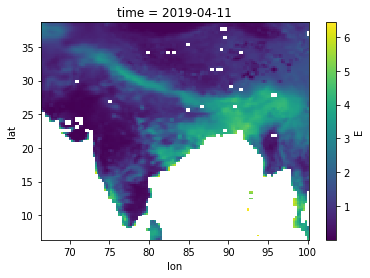

In [11]:
# transpose of original big one
ds2 = ds.transpose('time', 'lat', 'lon')
ds2.E.isel(time=100).plot()

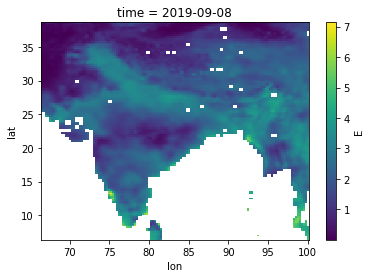

In [13]:
# Plot at time t
ds_out.E.isel(time=250).plot()

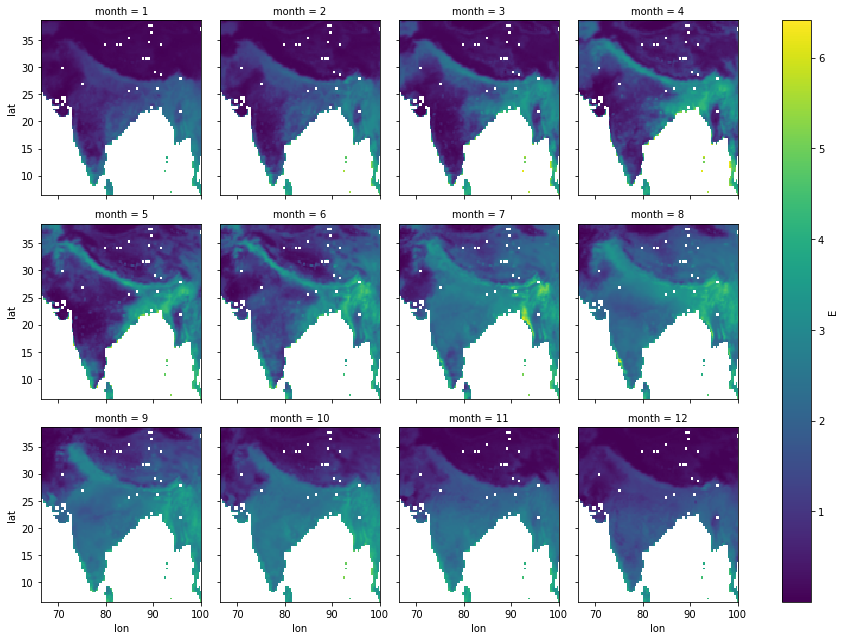

In [14]:
# Monthly averaged
monthly_means = ds_out.groupby("time.month",).mean()
# xarray's groupby reductions drop attributes. Let's assign them back so we get nice labels.
monthly_means.E.attrs = ds_out.E.attrs
monthly_means

fg = monthly_means.E.plot(
    col="month",
    col_wrap=4,  # each row has a maximum of 4 columns
)


In [15]:
# Saved nc to disk 
ds_out.to_netcdf("saved_on_disk.nc")

In [16]:
import rioxarray
import geopandas

geodf = geopandas.read_file(r"/home/gess-icwar/Desktop/Matlab Code/_Clim_Pred_LRF_New_RF25_IMD0p252021".nc)
xds = rioxarray.open_rasterio(r"/home/gess-icwar/Desktop/Matlab Code/_Clim_Pred_LRF_New_RF25_IMD0p252021saved_on_disk.nc")
clipped = xds.rio.clip(geodf.geometry.values, geodf.crs)

AttributeError: 'str' object has no attribute 'nc'

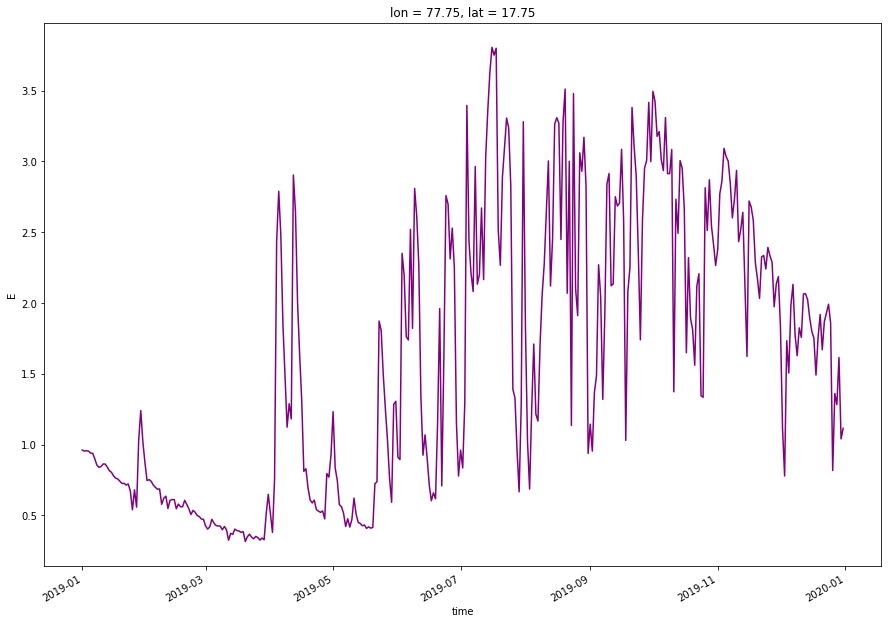

In [29]:
# one grid
ds_oneg = ds_out.isel(lat=45, lon=45)
ds_oneg['E'].plot.line(color="purple",size=10)

In [28]:
import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping


ds = xarray.open_dataarray('/home/gess-icwar/Desktop/Matlab Code/_Clim_Pred_LRF_New_RF25_IMD0p252019.nc')
ds.rio.set_spatial_dims(x_dim="LONGITUDE", y_dim="LATITUDE", inplace=True)
ds.rio.write_crs("epsg:4326", inplace=True)
India_Shape = geopandas.read_file('/home/gess-icwar/OneDriver/Desktop/python/India_Boundary.shp', crs="epsg:4326")

clipped = ds.rio.clip(India_Shape.geometry.apply(mapping), India_Shape.crs, drop=False)
clipped.rio.to_raster("clipped.tif", compress='LZMA', tiled=True, dtype="int32")

ERROR 1: PROJ: proj_create_from_database: /home/gess-icwar/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/gess-icwar/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/gess-icwar/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


RasterioIOError: Cannot create TIFF file due to missing codec for LZMA.